In [1]:
from tokenizers import Tokenizer
from transformers import PreTrainedTokenizerFast
import matplotlib.pyplot as plt
from tqdm import tqdm

In [1]:
SLICE_TOKENIZER_PATH = "/home/so87pot/n0w0f/regression-transformer/slice-assets/slice_vocab.txt"

In [1]:
vocab_file_path = '/home/so87pot/n0w0f/structllm/notebooks/extended_periodic_table_vocab.txt'
from structllm.tokenizer.slice_tokenizer import AtomVocabTokenizer
tokenizer = AtomVocabTokenizer(vocab_file_path, 
                model_max_length=512,truncation=False, padding=False)

special_tokens = {
    "unk_token": "[UNK]",
    "pad_token": "[PAD]",
    "cls_token": "[CLS]",
    "sep_token": "[SEP]",
    "mask_token": "[MASK]",
}


tokenizer.add_special_tokens(special_tokens)
            

In [3]:
tokenizer.pad_token

'[PAD]'

In [18]:
# def _tokenize_pad_and_truncate(texts):
#     """Tokenizes, pads, and truncates input texts."""
#     return tokenizer(texts["slices"], truncation=True, padding="max_length", max_length=128)

# tokenized_train_datasets = train_dataset.map(_tokenize_pad_and_truncate, batched=True)

def _tokenize_pad_and_truncate(texts):
    """Tokenizes, pads, and truncates input texts."""
    print(texts["slices"])
    return tokenizer(texts["slices"], truncation=True, padding="max_length", max_length=128)



Map:   0%|          | 0/84890 [00:00<?, ? examples/s]

TypeError: '<' not supported between instances of 'NoneType' and 'int'

In [9]:
from tqdm import tqdm
import matplotlib.pyplot as plt

def tokenize_save_and_plot(tokenizer, csv_path, txt_path, plot_path):
    tokenizer = tokenizer
    token_counts = []
    with open(csv_path, "rt") as fp, open(txt_path, "w") as out_fp:
        for line in tqdm(fp):
            line = line.strip()
            tokens = tokenizer.tokenize(text=line)
            out_fp.write(line + '\n')  # write original line to file
            out_fp.write(','.join(tokens) + '\n')  # write tokens to file
            out_fp.write(f"length:{len(tokens)}\n")  # write number of tokens to file
            out_fp.write("--------------\n")  # write separator to file
            token_counts.append(len(tokens))

    plt.hist(token_counts, bins='auto')
    plt.title('Token Count Distribution')
    plt.xlabel('Number of Tokens')
    plt.ylabel('Frequency')
    plt.savefig(plot_path)  # save the plot to a file
    plt.show()

    # Save distribution details to the file
    with open(txt_path, "a") as out_fp:
        out_fp.write("\nToken Count Distribution:\n")
        out_fp.write(f"Min: {min(token_counts)}\n")
        out_fp.write(f"Max: {max(token_counts)}\n")
        out_fp.write(f"Average: {sum(token_counts) / len(token_counts)}\n")

84891it [00:24, 3439.77it/s]


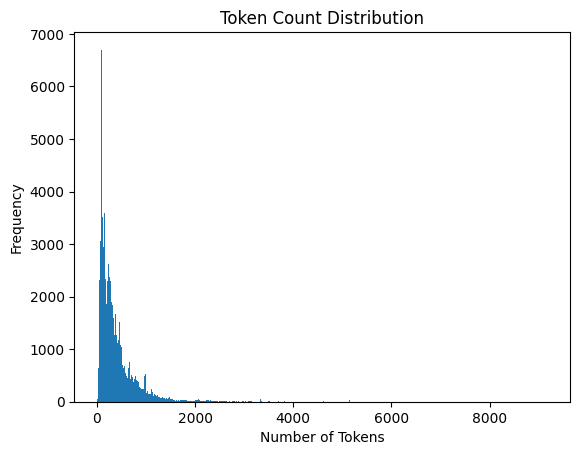

In [13]:
csv_path = "/home/so87pot/n0w0f/structllm/data/mb_1/csv/train_matbench_mp_gap_0.csv"

file_name = "ft_mp_gap_atom_tokenizer"
txt_path = f"/home/so87pot/n0w0f/structllm/results/atom_tokenizer_counts/{file_name}_tokens.txt"
plot_path = f"/home/so87pot/n0w0f/structllm/results/atom_tokenizer_counts/{file_name}_tokens.png"
tokenize_save_and_plot(tokenizer, csv_path, txt_path, plot_path)

In [6]:

class SliceTokenizer:
    def __init__(self, vocab_file=SLICE_TOKENIZER_PATH):
        _tokenizer = Tokenizer.from_file(vocab_file)
        self.tokenizer = PreTrainedTokenizerFast(
                    tokenizer_object=_tokenizer,
                    unk_token="[UNK]",
                    pad_token="[PAD]",
                    cls_token="[CLS]",
                    sep_token="[SEP]",
                    mask_token="[MASK]",
                )
    def tokenize(self, text):
        return self.tokenizer.tokenize(text)

In [1]:
from structllm.tokenizer.slice_tokenizer import AtomVocabTokenizer

In [2]:
# Example usage
vocab_file_path = '/home/so87pot/n0w0f/structllm/notebooks/extended_periodic_table_vocab.txt'
tokenizer = AtomVocabTokenizer(vocab_file_path)

input_string = "Cu Cu Cu Cu 0 3 - - o 0 2 - o - 0 1 o - - 1 2 - + o 1 3 - o + 2 3 o - + "
tokens = tokenizer.tokenize(input_string)
print("Tokens:", tokens)
print("len of Tokens:", len(tokens))

Tokens: ['Cu', 'Cu', 'Cu', 'Cu', '0', '3', '- - o', '0', '2', '- o -', '0', '1', 'o - -', '1', '2', '- + o', '1', '3', '- o +', '2', '3', 'o - +']
len of Tokens: 22


In [55]:
tokens = tokenizer.tokenize("Ga Ga P P 0 3 - - o 0 2 - o - 0 1 o - -")

In [64]:
tokenizer.tokenize("Se Se Mo 0 2 o o + 0 2 + o o 0 2 o + o 1 2 o o + 1 2 o + o 1 2 + o o ")

['S',
 'S',
 'Mo',
 '0',
 '2',
 'o o +',
 '0',
 '2',
 '+ o o',
 '0',
 '2',
 'o + o',
 '1',
 '2',
 'o o +',
 '1',
 '2',
 'o + o',
 '1',
 '2',
 '+ o o']

In [53]:
tokens

['Ga',
 'Ga',
 'Ga',
 'Ga',
 'P',
 'P',
 'P',
 'P',
 '0',
 '3',
 '- - o',
 '0',
 '2',
 '- o -',
 '0',
 '1',
 'o - -']

In [ ]:
tokenizer.convert_tokens_to_string(tokens)

In [49]:
tokenizer.decode(tokenizer.encode("Ga Ga Ga Ga Ga Ga Ga Ga 0 4 o o o 1 5 o o o 2 6 o o o 3 7 o o o "))

2024-01-12 16:28:10.816882: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-12 16:28:10.956627: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-12 16:28:13.110270: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-12 16:28:19.471794: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


'Ga Ga Ga Ga Ga Ga Ga Ga 0 4 o o o 1 5 o o o 2 6 o o o 3 7 o o o'

In [49]:
from transformers import PreTrainedTokenizer
import json
import os
import re

class AtomVocabTokenizer(PreTrainedTokenizer):
    def __init__(self, vocab_file, model_max_length=None, padding_length=None, **kwargs):
        super(AtomVocabTokenizer, self).__init__(model_max_length=model_max_length, **kwargs)
        
        self.vocab = self.load_vocab(vocab_file)
        self.vocab_file = vocab_file
        self.truncation = False
        self.padding = False
        self.padding_length = padding_length

    def load_vocab(self, vocab_file):
        _, file_extension = os.path.splitext(vocab_file)
        if file_extension == '.txt':
            with open(vocab_file, 'r', encoding='utf-8') as file:
                vocab = file.read().splitlines()
            return {token: idx for idx, token in enumerate(vocab)}
        elif file_extension == '.json':
            with open(vocab_file, 'r', encoding='utf-8') as file:
                return json.load(file)
        else:
            raise ValueError(f"Unsupported file type: {file_extension}")

    def tokenize(self, text):
        tokens = list(self.vocab.keys())
        string_tokens = [token for token in tokens if isinstance(token, str)]
        string_tokens.sort(key=len, reverse=True)
        escaped_tokens = [re.escape(token) for token in string_tokens]
        pattern_str = '|'.join(escaped_tokens)
        pattern = re.compile(pattern_str)
        matches = pattern.findall(text)

        if self.truncation and len(matches) > self.model_max_length:
            matches = matches[:self.model_max_length]

        if self.padding and len(matches) < self.padding_length:
            matches += [self.pad_token] * (self.padding_length - len(matches))

        return matches

    def convert_tokens_to_string(self, tokens):
        return ' '.join(tokens)

    def _add_tokens(self, new_tokens, **kwargs):
        for token in new_tokens:
            if token not in self.added_tokens_encoder:
                self.vocab[token] = len(self.vocab)

    def _convert_token_to_id(self, token):
        return self.vocab.get(token, self.vocab.get(self.unk_token))

    def _convert_id_to_token(self, index):
        return list(self.vocab.keys())[index]

    def enable_truncation(self, max_length):
        self.model_max_length = max_length
        self.truncation = True

    def disable_truncation(self):
        self.truncation = False

    def enable_padding(self, length=None):
        self.padding = True
        self.padding_length = length

    def disable_padding(self):
        self.padding = False

    def add_special_tokens(self, special_tokens):
        for token, value in special_tokens.items():
            if value not in self.vocab:
                setattr(self, token, value)
                self.vocab[value] = len(self.vocab)
        self.save_vocabulary(os.path.dirname(self.vocab_file))

    def save_vocabulary(self, save_directory, filename_prefix=None):
        index = 0
        if os.path.isdir(save_directory):
            vocab_files = list(filter(lambda x: x.endswith(".json"), os.listdir(save_directory)))
            for vocab_file in vocab_files:
                try:
                    index = max(index, int(vocab_file.split('-')[0]))
                except ValueError:
                    pass  # Ignore files that do not start with an integer

        vocab_file = os.path.join(save_directory, f"{index + 1}-{filename_prefix}.json" if filename_prefix else f"{index + 1}.json")

        with open(vocab_file, 'w', encoding='utf-8') as f:
            json.dump(self.vocab, f, ensure_ascii=False)

        return (vocab_file,)

    @classmethod
    def from_pretrained(cls, pretrained_model_name_or_path, *inputs, **kwargs):
        if pretrained_model_name_or_path is not None:
            if os.path.isdir(pretrained_model_name_or_path):
                vocab_files = list(filter(lambda x: x.endswith(".json"), os.listdir(pretrained_model_name_or_path)))
                vocab_files.sort(key=lambda x: int(x.split('-')[0]))
                vocab_file = os.path.join(pretrained_model_name_or_path, vocab_files[-1])

        if vocab_file is None:
            raise ValueError("You should specify a path to a vocab file")

        with open(vocab_file, 'r', encoding='utf-8') as f:
            vocab = json.load(f)

        tokenizer = cls(vocab_file, *inputs, **kwargs)
        tokenizer.vocab = vocab

        return tokenizer

In [50]:
vocab_file_path = '/home/so87pot/n0w0f/structllm/notebooks/extended_periodic_table_vocab.txt'

tokenizer = AtomVocabTokenizer(vocab_file_path, model_max_length=512, truncation=False, padding=False)

special_tokens = {
    "unk_token": "[UNK]",
    "pad_token": "[PAD]",
    "cls_token": "[CLS]",
    "sep_token": "[SEP]",
    "mask_token": "[MASK]",
}

tokenizer.add_special_tokens(special_tokens)

In [52]:
vocab_file_path = '/home/so87pot/n0w0f/structllm/notebooks/1.json'


tokenizer2 = AtomVocabTokenizer(vocab_file_path, model_max_length=512, truncation=False, padding=False)

special_tokens = {
    "unk_token": "[UNK]",
    "pad_token": "[PAD]",
    "cls_token": "[CLS]",
    "sep_token": "[SEP]",
    "mask_token": "[MASK]",
}

tokenizer2.add_special_tokens(special_tokens)

In [55]:
text = "Se Se Mo 0 2 o o + 0 2 + o o 0 2 o + o 1 2 o o + 1 2 o + o 1 2 + o o"
tokenized_text = tokenizer2.tokenize(text)
token_ids = tokenizer2.convert_tokens_to_ids(tokenized_text)
tokens = tokenizer2.convert_ids_to_tokens(token_ids)
tokenized_text, token_ids, tokens

(['Se',
  'Se',
  'Mo',
  '0',
  '2',
  'o o +',
  '0',
  '2',
  '+ o o',
  '0',
  '2',
  'o + o',
  '1',
  '2',
  'o o +',
  '1',
  '2',
  'o + o',
  '1',
  '2',
  '+ o o'],
 [60,
  60,
  68,
  139,
  141,
  1,
  139,
  141,
  9,
  139,
  141,
  3,
  140,
  141,
  1,
  140,
  141,
  3,
  140,
  141,
  9],
 ['Se',
  'Se',
  'Mo',
  '0',
  '2',
  'o o +',
  '0',
  '2',
  '+ o o',
  '0',
  '2',
  'o + o',
  '1',
  '2',
  'o o +',
  '1',
  '2',
  'o + o',
  '1',
  '2',
  '+ o o'])

In [54]:
text = "Se Se Mo 0 2 o o + 0 2 + o o 0 2 o + o 1 2 o o + 1 2 o + o 1 2 + o o"
tokenized_text = tokenizer.tokenize(text)
token_ids = tokenizer.convert_tokens_to_ids(tokenized_text)
tokens = tokenizer.convert_ids_to_tokens(token_ids)
tokenized_text, token_ids, tokens

(['Se',
  'Se',
  'Mo',
  '0',
  '2',
  'o o +',
  '0',
  '2',
  '+ o o',
  '0',
  '2',
  'o + o',
  '1',
  '2',
  'o o +',
  '1',
  '2',
  'o + o',
  '1',
  '2',
  '+ o o'],
 [60,
  60,
  68,
  139,
  141,
  1,
  139,
  141,
  9,
  139,
  141,
  3,
  140,
  141,
  1,
  140,
  141,
  3,
  140,
  141,
  9],
 ['Se',
  'Se',
  'Mo',
  '0',
  '2',
  'o o +',
  '0',
  '2',
  '+ o o',
  '0',
  '2',
  'o + o',
  '1',
  '2',
  'o o +',
  '1',
  '2',
  'o + o',
  '1',
  '2',
  '+ o o'])

In [12]:
text = "Se Se Mo 0 2 o o + 0 2 + o o 0 2 o + o 1 2 o o + 1 2 o + o 1 2 + o o"
tokenized_text = tokenizer.tokenize(text)
token_ids = tokenizer.convert_tokens_to_ids(tokenized_text)
tokens = tokenizer.convert_ids_to_tokens(token_ids)

In [15]:

from datasets import load_dataset
train_dataset = load_dataset("csv", data_files="/home/so87pot/n0w0f/structllm/data/mb_1/csv/train_matbench_mp_gap_0.csv")


def _tokenize_pad_and_truncate(texts):
    """Tokenizes, pads, and truncates input texts."""
    return tokenizer(texts["slices"], truncation=True, padding="max_length", max_length=128)

In [16]:
tokenized_train_datasets = train_dataset.map(_tokenize_pad_and_truncate, batched=True)

Map:   0%|          | 0/84890 [00:00<?, ? examples/s]

In [21]:
tokenized_train_datasets

DatasetDict({
    train: Dataset({
        features: ['slices', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 84890
    })
})

In [31]:
tokenized_train_datasets['train']['slices']

['K K K K Mn Mn Mn Mn O O O O O O O O 0 11 - - - 0 9 - - - 0 10 - o o 0 15 o - - 0 12 o o - 0 14 o o o 1 8 o - - 1 15 o - - 1 12 o o - 1 9 o - - 1 10 o o o 1 13 o o o 2 12 o o - 2 14 o o o 2 8 o o o 2 13 o o o 2 11 o o o 2 9 o o o 3 15 o o - 3 8 o o o 3 14 o + o 3 11 o o o 3 13 o + o 3 10 o + + 4 10 o o + 4 9 o o o 4 12 + o o 4 15 + o o 5 11 - - o 5 13 - o o 5 8 o - o 5 14 o o o 6 13 - o o 6 11 - o o 6 14 o o o 6 8 o o o 7 12 o o o 7 15 o o o 7 10 o o + 7 9 o o o 8 11 - o o 9 10 o o + 12 15 o o o 13 14 + o o ',
 'Cr Cr Cr Ni 0 2 - o o 0 2 - + o 0 2 o o o 0 2 o + o 0 1 - o o 0 1 - o + 0 1 o o o 0 1 o o + 0 3 o o o 0 3 o o + 0 3 o + o 0 3 o + + 1 3 o o o 1 3 o + o 1 3 + o o 1 3 + + o 1 2 o o - 1 2 o o o 1 2 o + - 1 2 o + o 2 3 o o o 2 3 o o + 2 3 + o o 2 3 + o + ',
 'Ca Ca Ca P P 0 4 - o o 0 4 o o o 0 3 o + + 0 3 o + o 0 3 o o + 0 3 o o o 1 4 o - o 1 4 o o o 1 3 + o + 1 3 + o o 1 3 o o + 1 3 o o o 2 4 o o - 2 4 o o o 2 3 + + o 2 3 + o o 2 3 o + o 2 3 o o o ',
 'Li Li Li Li Li Li Li Li Li

In [32]:
token_ids = tokenized_train_datasets['train'][4]['input_ids']

In [33]:
tokenizer.convert_ids_to_tokens(token_ids)

['In',
 'Sb',
 '0',
 '1',
 '- - o',
 '0',
 '1',
 '- o -',
 '0',
 '1',
 '- o o',
 '0',
 '1',
 'o - -',
 '0',
 '1',
 'o - o',
 '0',
 '1',
 'o o -',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[P

In [36]:
vocab_file_path = '/home/so87pot/n0w0f/structllm/notebooks/1.json'

tokenizer2 = AtomVocabTokenizer(vocab_file_path, model_max_length=512, truncation=False, padding=False)

special_tokens = {
    "unk_token": "[UNK]",
    "pad_token": "[PAD]",
    "cls_token": "[CLS]",
    "sep_token": "[SEP]",
    "mask_token": "[MASK]",
}

tokenizer2.add_special_tokens(special_tokens)

In [41]:
text = "Se Se Mo 0 2 o o + 0 2 + o o 0 2 o + o 1 2 o o + 1 2 o + o 1 2 + o o"
tokenized_text = tokenizer.tokenize(text)


In [ ]:
token_ids = tokenizer.convert_tokens_to_ids(tokenized_text)
tokens = tokenizer.convert_ids_to_tokens(token_ids)

In [44]:
from transformers import PreTrainedTokenizer
import os
import re

class AtomVocabTokenizer(PreTrainedTokenizer):
    def __init__(self, vocab_file, model_max_length=None, **kwargs):
        super(AtomVocabTokenizer, self).__init__(model_max_length=model_max_length, **kwargs)
        
        # Load vocabulary from the provided file
        self.vocab = self.load_vocab(vocab_file)
        

    def load_vocab(self, vocab_file):
        with open(vocab_file, 'r', encoding='utf-8') as file:
            vocab = file.read().splitlines()
        return {token: idx for idx, token in enumerate(vocab)}
        
        
        
    def tokenize(self, text):
        # List of tokens
        tokens = list(self.vocab.keys())

        # Escape special characters in the vocab to ensure they are treated as literals in the regex
        escaped_tokens = [re.escape(token) for token in tokens]

        # Join the escaped vocab terms into a regex pattern
        pattern_str = '|'.join(escaped_tokens)
        pattern = re.compile(pattern_str)

        # Find all matches in the text
        matches = pattern.findall(text)
        return matches

    def convert_tokens_to_string(self, tokens):
        return ' '.join(tokens)

    def _add_tokens(self, new_tokens, **kwargs):
        # Override _add_tokens to add new tokens to the vocabulary
        for token in new_tokens:
            if token not in self.added_tokens_encoder:
                self.vocab[token] = len(self.vocab)
                self.ids_to_tokens[len(self.ids_to_tokens)] = token

    def _convert_token_to_id(self, token):
        return self.vocab.get(token, self.vocab.get(self.unk_token))

    def _convert_id_to_token(self, index):
        return list(self.vocab.keys())[index]

    def save_vocabulary(self, vocab_path):
        with open(vocab_path, 'w', encoding='utf-8') as file:
            file.write('\n'.join(self.vocab))

# Example usage
vocab_file_path = '/home/so87pot/n0w0f/structllm/notebooks/extended_periodic_table_vocab.txt'
tokenizer = AtomVocabTokenizer(vocab_file_path)

input_string = "F F F F K K Zn 0 6 o o o 0 6 + o o 0 4 o o - 0 4 o - - 0 5 o o o 0 5 o - o 1 6 o + o 1 6 o o o 1 4 o o - 1 4 - o - 1 5 o o o 1 5 - o o 2 6 + + + 2 4 + + o 2 4 + o o 2 4 o + o 2 4 o o o 2 5 o o o 3 6 o o o 3 4 o o o 3 5 o o o 3 5 o - o 3 5 - o o 3 5 - - o "
tokens = tokenizer.tokenize(input_string)
print("Tokens:", tokens)
print("len of Tokens:", len(tokens))


Tokens: ['F', 'F', 'F', 'F', 'K', 'K', 'Zn', '0', '6', 'o o o', '0', '6', '+ o o', '0', '4', 'o o -', '0', '4', 'o - -', '0', '5', 'o o o', '0', '5', 'o - o', '1', '6', 'o + o', '1', '6', 'o o o', '1', '4', 'o o -', '1', '4', '- o -', '1', '5', 'o o o', '1', '5', '- o o', '2', '6', '+ + +', '2', '4', '+ + o', '2', '4', '+ o o', '2', '4', 'o + o', '2', '4', 'o o o', '2', '5', 'o o o', '3', '6', 'o o o', '3', '4', 'o o o', '3', '5', 'o o o', '3', '5', 'o - o', '3', '5', '- o o', '3', '5', '- - o']
len of Tokens: 79


In [ ]:
# Example usage
vocab_file_path = '/home/so87pot/n0w0f/structllm/notebooks/extended_periodic_table_vocab.txt'
tokenizer = AtomVocabTokenizer(vocab_file_path)

input_string = "F F F F K K Zn 0 6 o o o 0 6 + o o 0 4 o o - 0 4 o - - 0 5 o o o 0 5 o - o 1 6 o + o 1 6 o o o 1 4 o o - 1 4 - o - 1 5 o o o 1 5 - o o 2 6 + + + 2 4 + + o 2 4 + o o 2 4 o + o 2 4 o o o 2 5 o o o 3 6 o o o 3 4 o o o 3 5 o o o 3 5 o - o 3 5 - o o 3 5 - - o "
tokens = tokenizer.tokenize(input_string)
print("Tokens:", tokens)
print("len of Tokens:", len(tokens))
